## t-SNE可视化

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#### 加载数据

In [3]:
data_path = "../data\CICAPT_IIOT/Phase2_Provenance_embeddings.csv"
data_raw= pd.read_csv(data_path)

C:\Users\14551\AppData\Local\Temp\ipykernel_2008\397032103.py:2: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw= pd.read_csv(data_path)


In [ ]:
# 对object标签进行编码
for col in data_raw.select_dtypes(include='object').columns:
    data_raw[col], _ = pd.factorize(data_raw[col])

In [12]:
data_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,label,subLabel
0,-0.097233,-0.343203,0.403886,0.353790,-0.257627,-0.345297,0.254667,-0.365886,-0.443869,-0.371410,...,0.549974,-0.282237,-0.166280,-0.025900,0.061412,-0.056863,0.192762,0.000047,0,0
1,-0.021337,-0.384100,0.172191,0.065555,0.013838,-0.152572,0.061372,-0.118328,-0.162911,-0.086753,...,0.322964,-0.088465,0.047437,-0.188235,0.099875,-0.191090,0.036459,0.038361,0,0
2,-0.043949,-1.485370,1.121047,-0.238977,0.207114,-0.158175,0.056589,-0.515189,-0.633050,-0.417580,...,1.646793,-0.692245,-0.204356,-0.800896,0.792935,-1.004095,0.131169,0.145677,0,0
3,-0.557434,-2.510323,1.882360,0.389163,-0.526690,-1.210114,0.873368,0.847701,-0.889615,0.725650,...,1.621623,-0.818394,0.187252,-1.395306,0.924288,-0.880923,-0.062069,-0.030570,0,0
4,0.350668,-1.329701,0.221294,0.255904,-0.309510,-0.006422,-0.104551,0.869999,0.677377,-0.059746,...,-0.073186,0.102409,1.127352,-0.954356,0.548284,-1.042698,-0.549883,0.165665,0,0


In [5]:
X = data_raw.iloc[:, :64] # 除去最后两列（label和sublabel）作为特征矩阵
label = data_raw['label']
type = data_raw['type']
subtype = data_raw['subtype']

#### t-SNE降维

In [6]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
X_embedded = tsne.fit_transform(X)

d:\Anaconda\envs\apt\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


#### 可视化

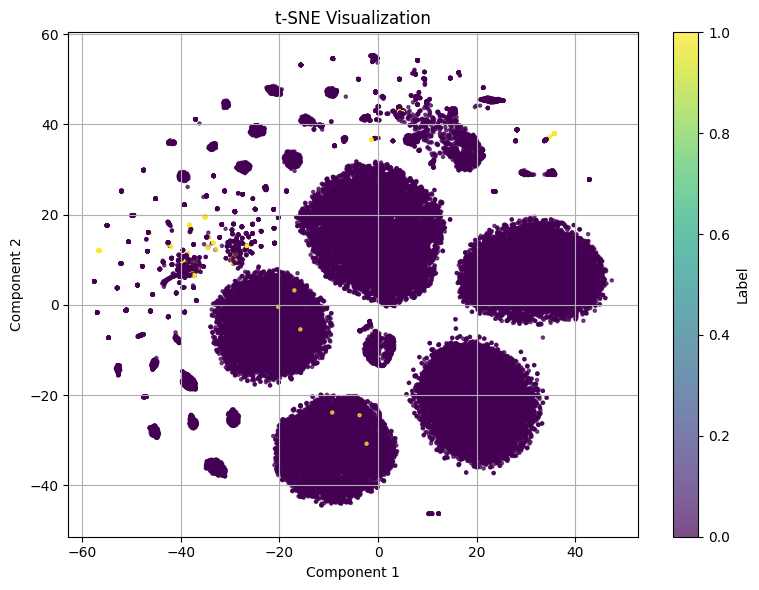

In [11]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=label, cmap='viridis', s=5, alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()